<a href="https://colab.research.google.com/github/ihabiba/ML-customer-analysis/blob/main/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [1]:
import pandas as pd

In [2]:
# Load the dataset (just the filename, since it's in the same folder)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
# Check the column names to ensure the correct ones are present
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder

# List of binary columns for label encoding
label_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

label_encoder = LabelEncoder()

# Apply label encoding to each binary column
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after label encoding
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [7]:
# One-Hot Encoding for the multi-category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False)

# Convert boolean columns to integer 0/1
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

# Display the first few rows after one-hot encoding
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,0,2,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,2,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,2,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [8]:
df.shape

(7043, 28)

In [9]:
# Check for non-numeric values in the columns to scale
non_numeric_tenure = df['tenure'].apply(pd.to_numeric, errors='coerce').isna()
non_numeric_monthlycharges = df['MonthlyCharges'].apply(pd.to_numeric, errors='coerce').isna()
non_numeric_totalcharges = df['TotalCharges'].apply(pd.to_numeric, errors='coerce').isna()

# Display the rows with non-numeric values in each column
print("Rows with non-numeric values in 'tenure':")
print(df[non_numeric_tenure])

print("\nRows with non-numeric values in 'MonthlyCharges':")
print(df[non_numeric_monthlycharges])

print("\nRows with non-numeric values in 'TotalCharges':")
print(df[non_numeric_totalcharges])


Rows with non-numeric values in 'tenure':
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, InternetService_DSL, InternetService_Fiber optic, InternetService_No, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 28 columns]

Rows with non-numeric values in 'MonthlyCharges':
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, InternetService_DSL, InternetService_Fiber optic, InternetService_No, C

In [10]:
import numpy as np

# Convert empty strings in 'TotalCharges' to NaN (without using inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [11]:
# Convert 'TotalCharges' to numeric (to handle any remaining non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
# Now drop the rows with NaN in 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

In [13]:
df.shape

(7032, 28)

In [14]:
df.apply(lambda x: x == '').sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0


In [15]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to the numerical columns
scaler = StandardScaler()

# Apply scaling to 'tenure', 'MonthlyCharges', and 'TotalCharges'
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Display the first few rows after scaling
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,0,2,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.064303,1,0,2,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,-1.239504,1,0,2,2,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.512486,0,1,2,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,-1.239504,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## RFE

Optimal number of features: 18
Selected features:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype='object')


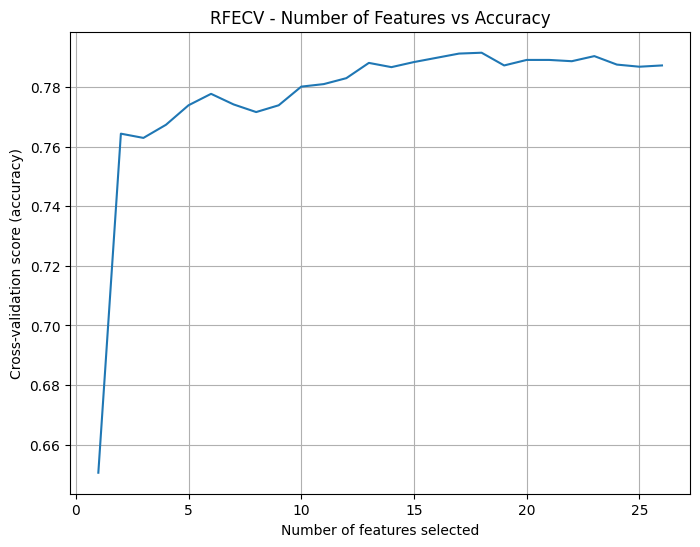

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Prepare data
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

rf = RandomForestClassifier(random_state=42)

# StratifiedKFold ensures balanced splits for classification
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features:")
print(X.columns[rfecv.support_])

# plot performance vs number of features
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("RFECV - Number of Features vs Accuracy")
plt.grid(True)
plt.savefig('assets/rfecv_cv_score_plot.png')
plt.show()

In [17]:
X_selected = X.loc[:, rfecv.support_]

In [18]:
X_selected.shape

(7032, 18)

# Splitting the data into 70% training and 30% testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y)


#  Supervised Learning

# 1st: Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix:
[[1387  162]
 [ 255  306]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


 Accuracy Score: 0.8024


### Confusion Matrix Heatmap for Logistic Regression

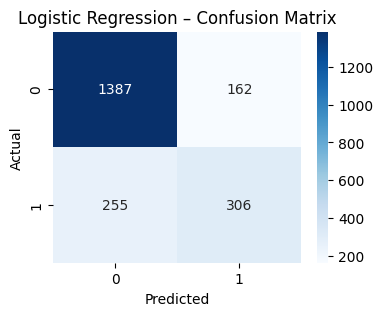

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('assets/lr_confusion_matrix_heatmap.png')
plt.show()

# 2nd: KNN

### finding best K

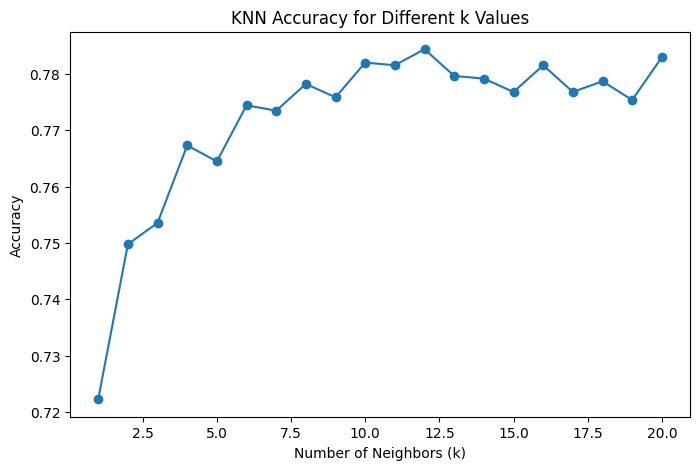

Best number of neighbors: 12 with accuracy: 0.7844


In [37]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)  # Test k from 1 to 20
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.savefig('assets/knn_accuracy_k_value_plot.png')
plt.show()

# Best k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best number of neighbors: {best_k} with accuracy: {max(accuracies):.4f}")

### Building the KNN model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize KNN with best k
knn = KNeighborsClassifier(n_neighbors=12)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score: {:.4f}".format(accuracy_score(y_test, y_pred)))


Confusion Matrix:
[[1392  157]
 [ 298  263]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Accuracy Score: 0.7844


# 3rd Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[1269  280]
 [ 301  260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1549
           1       0.48      0.46      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110

Accuracy Score: 0.7246445497630332


### Decision Tree with PREPRUNING

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for pre-pruning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold CV to find the best params
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Train with best parameters
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Best parameters: {'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 2}
Confusion Matrix:
[[1354  195]
 [ 258  303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.54      0.57       561

    accuracy                           0.79      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Accuracy Score: 0.7853080568720379


# 3rd: SVM

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the SVM model
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))


Confusion Matrix:
[[1380  169]
 [ 263  298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy Score: 0.795260663507109


### ROC Curves for All Models

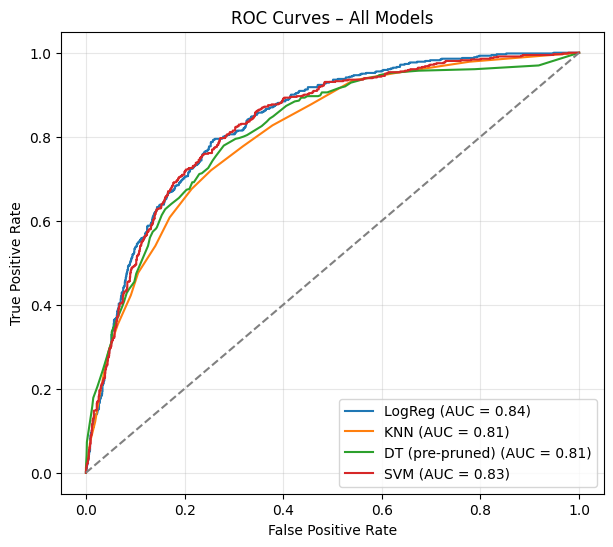

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "LogReg": lr_model,
    "KNN": knn,
    "DT (pre-pruned)": best_dt,
    "SVM": svm
}

plt.figure(figsize=(7,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curves – All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('assets/combined_roc_curves.png')
plt.show()

### Precision–Recall Curves for All Models

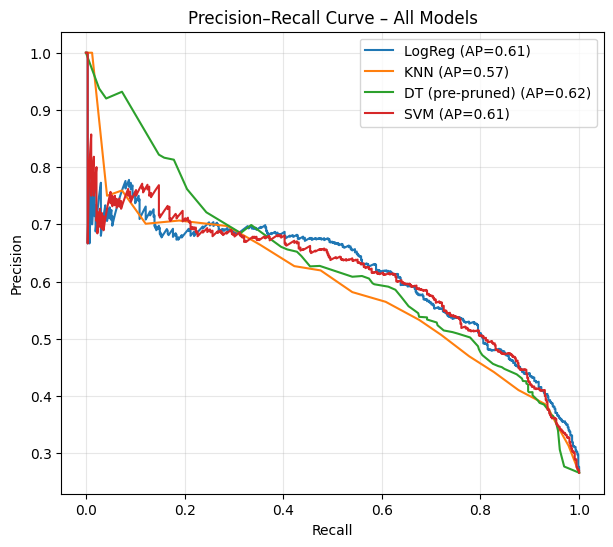

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

models = {
    "LogReg": lr_model,
    "KNN": knn,
    "DT (pre-pruned)": best_dt,
    "SVM": svm
}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.2f})")

plt.title("Precision–Recall Curve – All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('assets/combined_precision_recall_curves.png')
plt.show()

#  bar chart of model performance

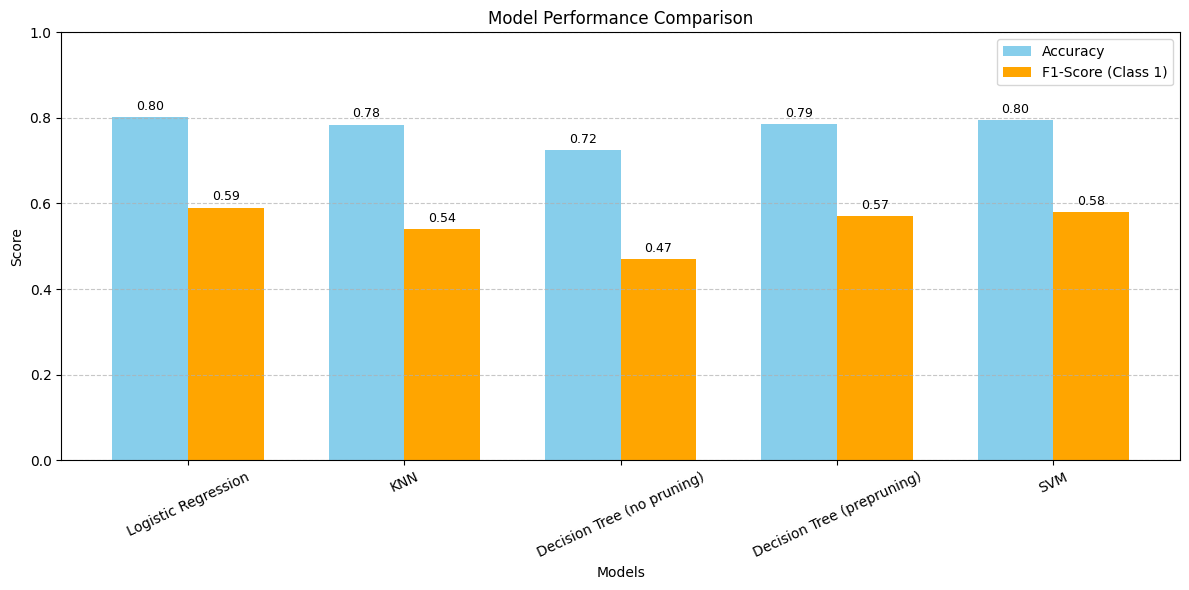

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Manually input performance scores for each model
model_names = [
    'Logistic Regression',
    'KNN',
    'Decision Tree (no pruning)',
    'Decision Tree (prepruning)',
    'SVM'
]

# Replace these with your actual numbers
accuracies = [
    0.8024,    # Logistic Regression
    0.7844,    # KNN
    0.7246,    # DT no pruning
    0.7853,    # DT prepruning
    0.7953     # SVM
]

f1_scores_class1 = [
    0.59,  # Logistic Regression
    0.54,  # KNN
    0.47,  # DT no pruning
    0.57,  # DT prepruning
    0.58   # SVM
]

# Set width of bars
bar_width = 0.35
x = np.arange(len(model_names))

# Create the bar chart
plt.figure(figsize=(12,6))
bars1 = plt.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + bar_width/2, f1_scores_class1, bar_width, label='F1-Score (Class 1)', color='orange')

# Add labels and formatting
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=25)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.savefig('assets/model_performance_comparison.png')
plt.show()

#  Feature Importance Analysis

## Feature Ranking

### Random Forest Feature Importance

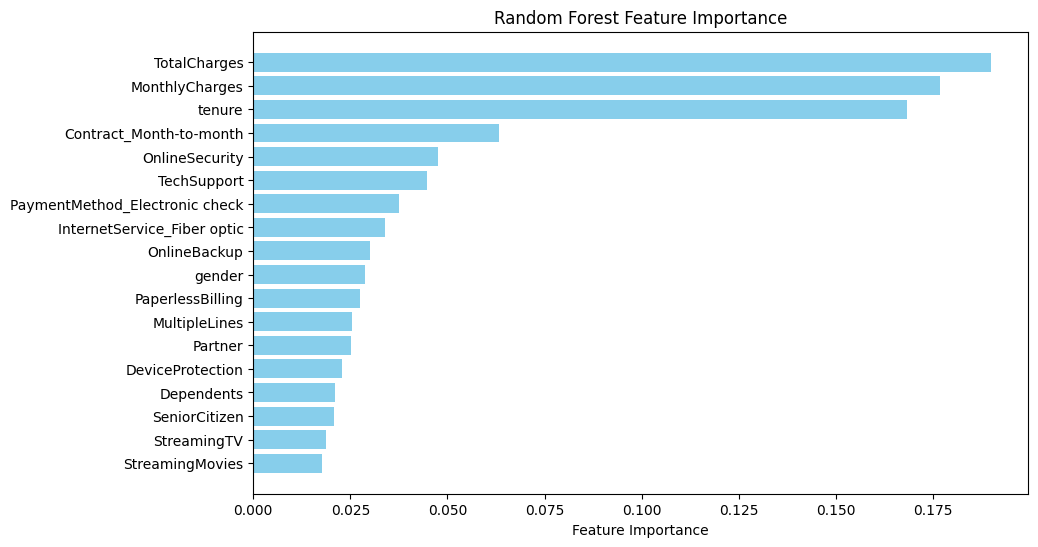

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import shap

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
features = X_selected.columns  # assuming X_selected is a DataFrame

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.savefig('assets/rf_feature_importance.png')
plt.show()

### SHAP Values for Explainability

SHAP values shape: (2110, 18, 2)
X_test shape: (2110, 18)


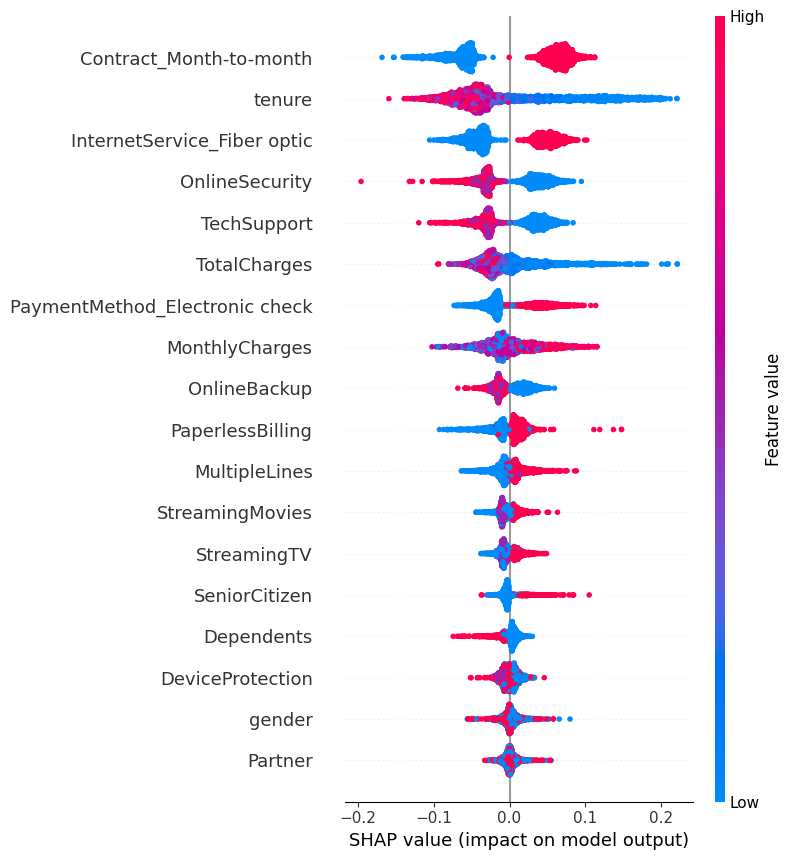

<Figure size 640x480 with 0 Axes>

In [44]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test)

# Check the shape:
print("SHAP values shape:", shap_values.values.shape)
print("X_test shape:", X_test.shape)

# For binary classification:
# If shape is (samples, features, classes), pick class 1:
if shap_values.values.ndim == 3:
    shap.summary_plot(shap_values.values[:, :, 1], X_test)
else:
    shap.summary_plot(shap_values.values, X_test)

plt.savefig('assets/shap_summary_plot.png')
plt.show()

In [34]:
import os

assets_folder = 'assets'

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(assets_folder):
    os.makedirs(assets_folder, exist_ok=True)
    print(f"Created folder: '{assets_folder}'")
else:
    print(f"Folder '{assets_folder}' already exists.")

Created folder: 'assets'


In [46]:
import shutil

# Create a zip archive of the 'assets' folder
output_filename = 'assets'
shutil.make_archive(output_filename, 'zip', 'assets')

print(f"Created '{output_filename}.zip' in the current directory.")

Created 'assets.zip' in the current directory.
